# Ausführung Sentiment Analyse: Regelbasiert

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
pd.options.display.max_rows = 4000
pd.options.display.max_colwidth = 1000

In [2]:
tweets = pd.read_pickle("./data/data_mining/tweets_raw.pkl")
tweets.shape[0]

40817

In [3]:
from sentiment_analysis.rule_based.afinn import afinn_sentiment

In [4]:
%%time
tweets = afinn_sentiment(tweets)

CPU times: user 2min 26s, sys: 1.88 s, total: 2min 28s
Wall time: 2min 33s


In [5]:
num_positive_tweets = tweets[tweets['afinn_sentiment_class'] == 1].shape[0]
num_neutral_tweets = tweets[tweets['afinn_sentiment_class'] == 0].shape[0]
num_negative_tweets = tweets[tweets['afinn_sentiment_class'] == -1].shape[0]

print("Anzahl positive Tweets: {0}".format(num_positive_tweets))
print("Anzahl neutraler Tweets: {0}".format(num_neutral_tweets))
print("Anzahl negativer Tweets: {0}".format(num_negative_tweets))

Anzahl positive Tweets: 18231
Anzahl neutraler Tweets: 16472
Anzahl negativer Tweets: 6114


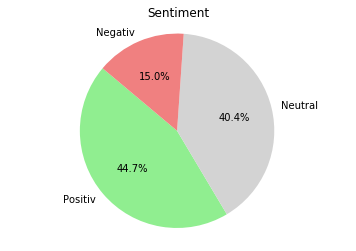

In [6]:
colors = ['lightgreen', 'lightgray', 'lightcoral']
labels = 'Positiv', 'Neutral', 'Negativ'

# Plot
plt.pie([num_positive_tweets, num_neutral_tweets, num_negative_tweets], labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.title("Sentiment")
plt.axis('equal')
plt.show()

In [7]:
tweets.to_pickle("./data/data_mining/tweets_with_rulebased_class.pkl")